In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Problem 1**

Standard Cauchy Distribution

In [2]:
def standard_cauchy_sampling(n):
    u=np.random.uniform(0,1,n)
    x=np.tan(np.pi*(u-0.5)) #Equating CDFs
    return x

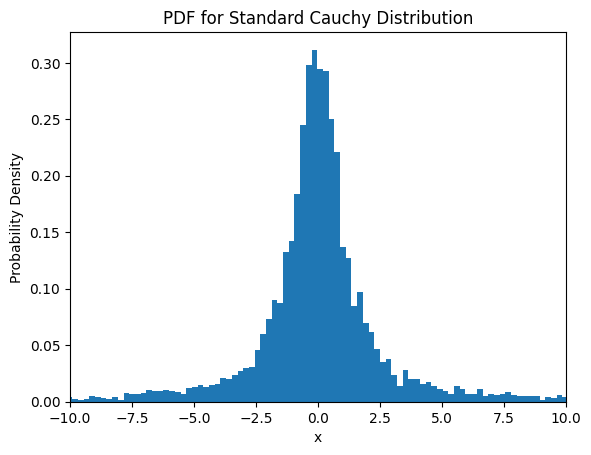

In [3]:
plt.hist(standard_cauchy_sampling(5000), bins='auto', density=True)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.xlim(-10,10)
plt.title('PDF for Standard Cauchy Distribution')
plt.show()

General Cauchy Distribution

In [4]:
def general_cauchy_sampling(x0,gamma,n):
    u=np.random.uniform(0,1,n)
    x=x0+gamma*np.tan(np.pi*(u-0.5))
    return x

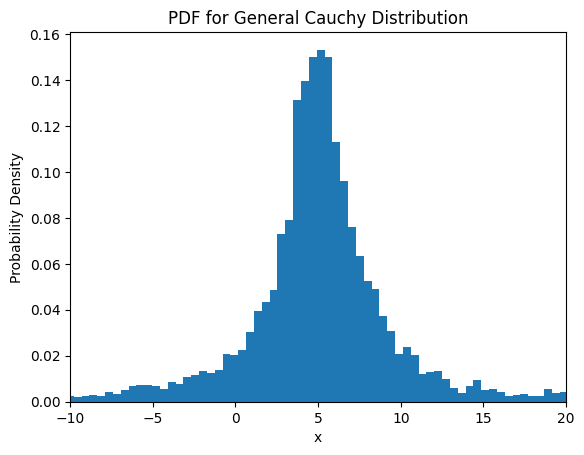

In [5]:
plt.hist(general_cauchy_sampling(5,2,5000), bins='auto', density=True) #Double the FWHM
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.xlim(-10,20)
plt.title('PDF for General Cauchy Distribution')
plt.show()

W-Boson Mass Distribution

In [6]:
def prob_w_mass(x0,gamma,threshold):
    cdf=0.5+(1/np.pi)*np.arctan((threshold-x0)/gamma)
    return 1-cdf

In [7]:
x0=80.4 #W Pole Mass (GeV)
gamma=1.04 #Half the Decay Width (GeV)
threshold=90 #(GeV)

prob_greater_than_90=prob_w_mass(x0,gamma,threshold) #Using analytic expression for CDF at 90 to find probability

print(f"The probability that the mass exceeds 90 GeV is: {prob_greater_than_90:.4f}")

The probability that the mass exceeds 90 GeV is: 0.0343


In [8]:
#Alternately, can sample using the above function

sample_size=100000

masses=general_cauchy_sampling(x0,gamma,sample_size)
prob_greater_than_90=len(masses[masses>threshold])/sample_size

print(f"The probability that the mass exceeds 90 GeV is: {prob_greater_than_90:.4f}")

The probability that the mass exceeds 90 GeV is: 0.0345


**Problem 2**

In [9]:
def mc_integral(f,a,b,n):
    x=np.random.uniform(a,b,n)
    return (b-a)/n*np.sum(f(x)), np.std(f(x))/np.sqrt(n)

In [10]:
int_trial,unc_trial=mc_integral(np.sin,0,np.pi,1000000)
print(f"The estimated integral is: {int_trial:.4f}")
print(f"The uncertainty is: {unc_trial:.4f}")
print(f"The exact value is: {2.0}")

The estimated integral is: 1.9995
The uncertainty is: 0.0003
The exact value is: 2.0


In [11]:
def f(x):
    return np.sin(x**2)

In [12]:
integral,uncertainty=mc_integral(f,0,10,1000000)
print(f"The estimated integral is: {integral:.4f}")
print(f"The uncertainty is: {uncertainty:.4f}")

The estimated integral is: 0.5858
The uncertainty is: 0.0007


**Problem 3**

In [13]:
def second_derivative(f,x):
    h=1e-5
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

def trapezoidal_int(f,a,b,n):
    x=np.linspace(a, b, n+1)
    y=f(x)
    h=(b-a)/n
    f_double_prime=second_derivative(f,(a+b)/2)
    integral=(h/2)*(y[0]+2*np.sum(y[1:-1])+y[-1])
    uncertainty=((b-a)**3)/(12*n**2)*f_double_prime #Uncertainty for trapezoidal rule
    return integral, uncertainty

In [14]:
integral_trap,uncertainty_trap= trapezoidal_int(f,0,10,1000)

print(f"The estimated integral using the trapezoidal rule is: {integral_trap:.4f}")
print(f"The uncertainty using the trapezoidal rule is: {uncertainty_trap:.4f}")

The estimated integral using the trapezoidal rule is: 0.5838
The uncertainty using the trapezoidal rule is: 0.0013


**Problem 4**

In [15]:
def red_dice():
    return np.random.randint(1,7,5)
def blue_dice():
    return np.random.randint(1,7,5)

In [16]:
n_trials=100000

s_10=[]
s_oe_10=[]

for i in range(n_trials):
    red_dice_roll=red_dice()
    blue_dice_roll=blue_dice()
    s_10.append(np.sum(red_dice_roll)+np.sum(blue_dice_roll))
    s_oe_10.append(np.sum(blue_dice_roll[blue_dice_roll%2==1])+np.sum(red_dice_roll[red_dice_roll%2==0]))

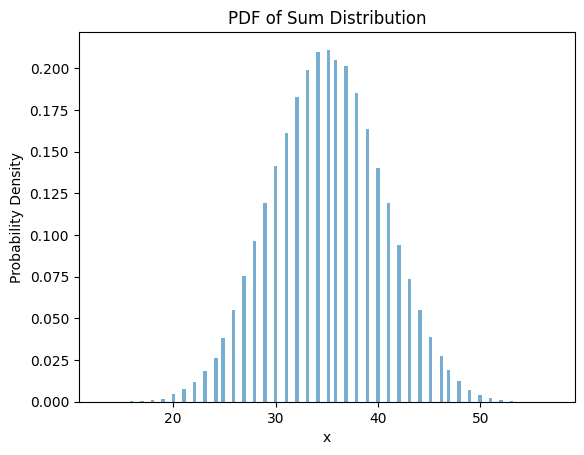

In [17]:
plt.hist(s_10, bins='auto', density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF of Sum Distribution')
plt.show()

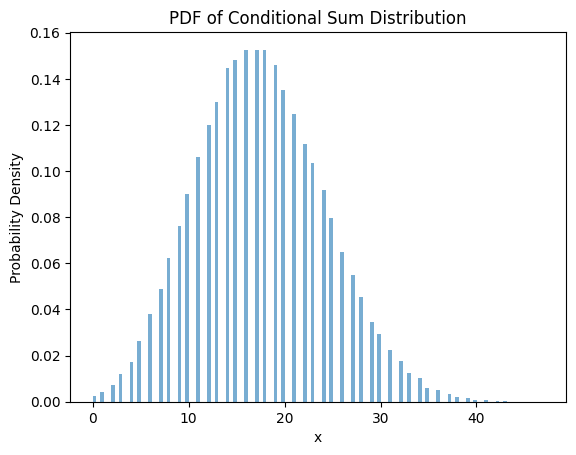

In [18]:
plt.hist(s_oe_10, bins='auto', density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF of Conditional Sum Distribution')
plt.show()

In [19]:
x_val=29

prob_s_10=s_10.count(x_val)/n_trials
prob_s_oe_10=s_oe_10.count(x_val)/n_trials

std_s_10=np.std(s_10)/np.sqrt(n_trials)
std_s_oe_10=np.std(s_oe_10)/np.sqrt(n_trials)

print(f"The probability that the sum is {x_val} is: {prob_s_10:.4f} with an uncertainty of {std_s_10:.4f}")
print(f"The probability that the conditional sum is {x_val} is: {prob_s_oe_10:.4f} with an uncertainty of {std_s_oe_10:.4f}")

The probability that the sum is 29 is: 0.0409 with an uncertainty of 0.0170
The probability that the conditional sum is 29 is: 0.0132 with an uncertainty of 0.0211


**Problem 5**

In [20]:
n_samples = 100000

uniform_samples=np.random.uniform(10,20,n_samples)
gaussian_noise=np.random.normal(0,1,n_samples)
data=uniform_samples+gaussian_noise

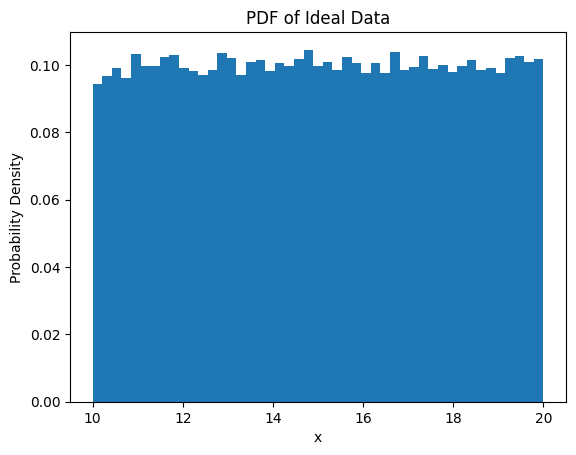

In [21]:
plt.hist(uniform_samples, bins='auto', density=True)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF of Ideal Data')
plt.show()

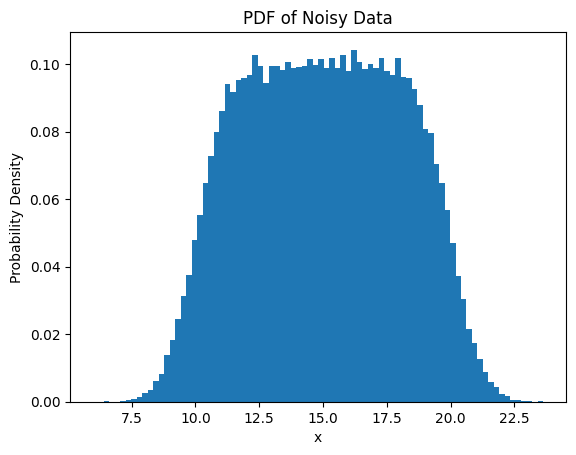

In [22]:
plt.hist(data, bins='auto', density=True)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF of Noisy Data')
plt.show()

In [23]:
nosiy_prob_greater_than_20=len(data[data>20])/n_samples
pure_prob_greater_than_20=len(uniform_samples[uniform_samples>20])/n_samples

print(f"The probability that the noisy data is greater than 20 is: {nosiy_prob_greater_than_20:.4f}")
print(f"The probability that the pure data is greater than 20 is: {pure_prob_greater_than_20}") #Not Possible

The probability that the noisy data is greater than 20 is: 0.0399
The probability that the pure data is greater than 20 is: 0.0
